For practising standardization, I will use boston dataset available in sklearn

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# dataset
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler

In [76]:
# load the the Boston House price data
boston_dataset = load_boston()

# Create the dataframe
ds = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add target
ds['MEDV'] = boston_dataset.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [77]:
# lets check the data's
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [78]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

ds.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The different variables shows different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. Note, how the 75th and 25th quantiles are quite different in the different variables.

When performing robust absolute scaling of the data set, we need to first identify the median and quantiles of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test.

In [79]:
# Splitting the train and test data
X_train, X_test, y_train, y_test = train_test_split(ds.drop('MEDV', axis=1),
                                                    ds['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

# print the shape
X_train.shape, X_test.shape

((354, 13), (152, 13))

### RobustScaling
In this process the median is removed from the observations and then they are scaled to the inter-quantile range (IQR)

In [80]:
# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# let's print the median values of the features learned from train set
print(scaler.center_)

[2.62660e-01 0.00000e+00 8.56000e+00 0.00000e+00 5.38000e-01 6.21550e+00
 7.94500e+01 3.21570e+00 5.00000e+00 3.11000e+02 1.91000e+01 3.91605e+02
 1.11600e+01]


In [82]:
# lets print the IQR values of the features learned from the train set
print(scaler.scale_)

[3.030275e+00 2.000000e+01 1.315000e+01 1.000000e+00 1.792500e-01
 7.520000e-01 4.857500e+01 2.971650e+00 2.000000e+01 3.900000e+02
 2.800000e+00 1.963250e+01 9.982500e+00]


In [83]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [84]:
# let's have a look at the original training dataset: median values
# np.round to reduces the number of decimals to 1.

np.round(X_train.median(), 1)

CRIM         0.3
ZN           0.0
INDUS        8.6
CHAS         0.0
NOX          0.5
RM           6.2
AGE         79.4
DIS          3.2
RAD          5.0
TAX        311.0
PTRATIO     19.1
B          391.6
LSTAT       11.2
dtype: float64

In [86]:
# Now, let's have a look at the scaled training dataset: median values
# np.round to reduces the number of decimals to 1.

np.round(X_train_scaled.median(), 1)

CRIM      -0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM        -0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B         -0.0
LSTAT      0.0
dtype: float64

The variables were centered to the median values.


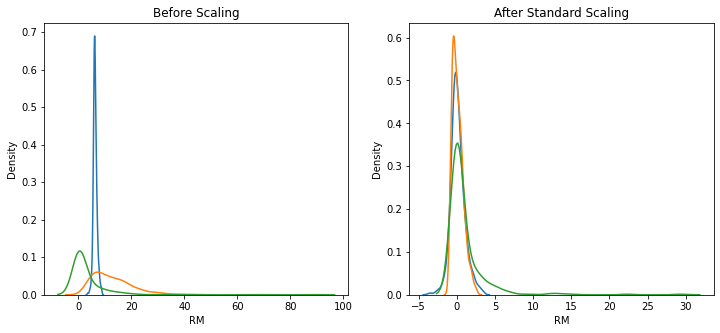

In [87]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

We can see that, the median of the distributions are centered at zero, but every other parameter may vary in the different variables. It does, though, squeeze the value range in the original variables, particularly for those highly skewed, like CRIM.

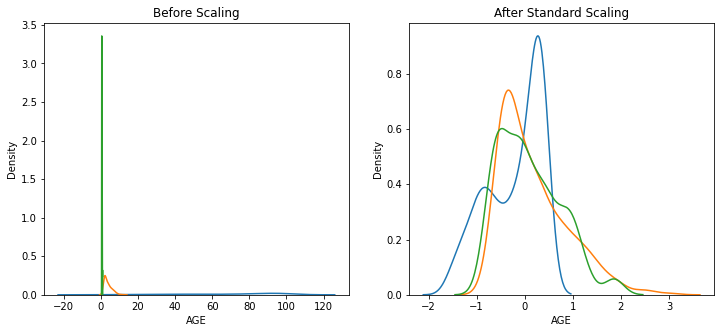

In [88]:
# let's compare the variable distributions before and after scaling for some 
# other features

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

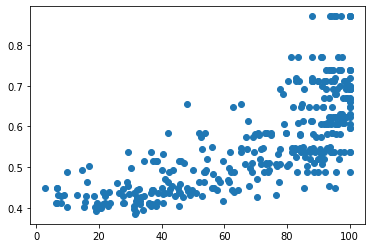

In [89]:
plt.scatter(X_train['AGE'], X_train['NOX'])

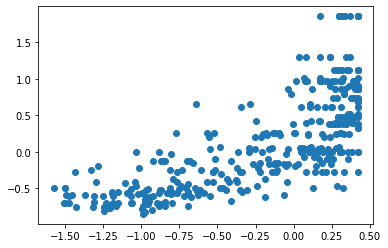

In [90]:
  plt.scatter(X_train_scaled['AGE'], X_train_scaled['NOX'])

We can see from the scatter plot that the original distribution is preserved